In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

# $k$ Nearest Neighbors Classifier

- Predict the class (or color) of a given new point based on the classes (or color) of its k nearest neighbor

- For example, the most frequent class (or color), and possibly weight the frequency by distance

- If algorithm implemented manually, make sure you leave-one-out as the nearest neighbor of a point will always be itself!
> <img src=https://upload.wikimedia.org/wikipedia/commons/e/e7/KnnClassification.svg width=200>

# Example (1 nearest neighbor coded manually)


### Nearest Neighbor


- Assign label or value of nearest neighbor (NN) in the training set

In [45]:
# Load iris data set
iris = datasets.load_iris()
X = iris.data[:,:]
y = iris.target

print ('Unique classes:', np.unique(y))

y_pred = -1 * np.ones(y.size)

# loop on query set
for i in range(y.size): 
    
    d2min = 1e99  # something large
    
    # loop on training set
    for j in range(y.size):
        if i != j:               # leave one out
            d = X[i,:] - X[j,:]  # diff vector
            d2 = d.dot(d)        # its length squared
            if d2 < d2min:       # check if closer
                d2min = d2       # save it 
                y_pred[i] = y[j]


print("Number of mislabeled points out of a total {:d} points: {:d}".format(y.size, sum(y!=y_pred)))

Unique classes: [0 1 2]
Number of mislabeled points out of a total 150 points: 6


# Example (1 nearest neighbor using sklearn package)

### $k$ Nearest Neighbors

- Assign label or value based $k$ nearest neighbors ($k$-NN) in the training set

> For example, the most frequent "vote" <br/> possibly with weighting

- Using $k$ instead of a distance cutoff helps with large density contrasts

In [44]:
from sklearn import neighbors

X = iris.data[:,:2] # using only 2 features for each
y = iris.target

clf = neighbors.KNeighborsClassifier(1)
y_pred = clf.fit(X,y).predict(X)

print("Number of mislabeled points out of a total {:d} points: {:d}".format(y.size, sum(y!=y_pred)))

Number of mislabeled points out of a total 150 points: 11


# Example (15 nearest neighbor using sklearn package with different weighting)

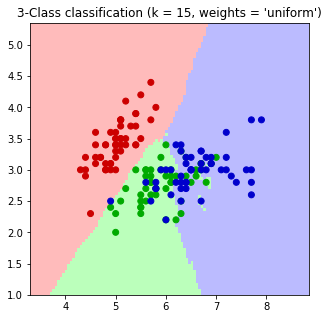

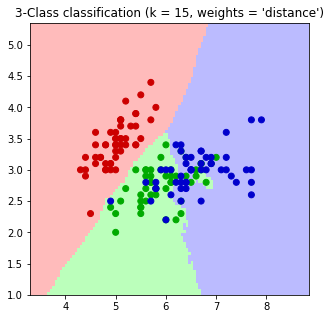

In [43]:
# Create color maps
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFBBBB', '#BBFFBB', '#BBBBFF'])
cmap_bold = ListedColormap(['#CC0000', '#00AA00', '#0000CC'])

n_neighbors = 15

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:,:2]  # we only take the first two features
y = iris.target

h = .05  # step size in the mesh


for weights in ['uniform', 'distance']:
    
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
    y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(5,5))
    if False:
        plt.scatter(xx, yy, c=Z, cmap=cmap_light, edgecolor='none')
    else:
        plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:,0], X[:,1], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = {:d}, weights = '{}')".format(n_neighbors, weights)) 